In [13]:
## Import all diferent libraries
import os, sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import numpy as np
import pandas as pd
import glob
import yaml
import pprint
from datetime import datetime
from scipy.stats import ttest_ind
import seaborn as sns
from matplotlib import pyplot as plt
import re


In [68]:
##gets access to file path and gets data

paths = yaml.load(open('../../../paths.yaml', 'r'), Loader=yaml.FullLoader)

DATA_FOLDER = paths['data'] + '2021-08-post-mortem-biologic-pc/'
FILE_GROUP_REGEX_LIST = ['*coin*cell*precondition*.mpt*']
## sorts every file that has coin and hppc in the folder. datafolder is a path to the folder 
file_paths = [sorted(glob.glob(f'{DATA_FOLDER}{f}')) for f in FILE_GROUP_REGEX_LIST]

file_paths

[['/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_graphite_cell7_precondition_2_CA7.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_graphite_cell7_precondition_3_CA7.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_graphite_cell7_precondition_4_CA7.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_graphite_cell7_precondition_CA7.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_lfp_cell4_precondition_CA2_CA4.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_lfp_cell5_precondition_2_CA4.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_lfp_cell5_precondition_3_CA4.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_lfp_cell5_precondition_CA4.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210817_coin_nmc111_cell2_precondition_2_CA2.mpt'

In [57]:
def Quantity(df):
    cycles_num=np.unique(df['cycle number'])
    Time=[]
    Voltage=[]
    Current=[]
    #Resistance=[]
    Capacity_T=[]
    Capacity_C=[]
    for a in cycles_num:
        i=np.where(df['cycle number']==a)
        for d in i[0][1:-1]:
            if df.loc[d,'I/mA']<0:
                time1= df.loc[d-1, 'time/s']
                time2= df.loc[d, 'time/s']
                current_=abs(df.loc[d, 'I/mA'])
                Capacity_T.append(current_*(time2-time1)/3600) 
        Capacity_C.append(np.sum(Capacity_T))
        Capacity_T.clear    
    return Capacity_C

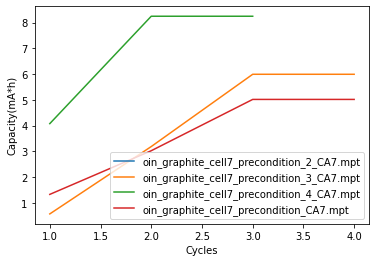

In [67]:
plt.figure()
plt.xlabel('Cycles')
plt.ylabel('Capacity(mA*h)')
for file1 in file_paths[0]:
    k=np.where(file_paths[0]== file1)
    num_header_lines = 106
    df = pd.read_csv(file1, header=num_header_lines, sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-1 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-2 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-3 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-5 , sep='\t', encoding='ISO-8859-1')
    Capacity= Quantity(df)
    Cycles=range(len(Capacity)+1)
    plt.plot(Cycles[1:], Capacity, label=file1[67:])
plt.legend()


##### 